In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading data
DataSet=pd.read_csv("E:\\..\\DataSets\\diabetes.csv")

In [4]:
# First five rows of the dataset
DataSet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Overall information of the dataset
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Number of rows and columns
DataSet.shape

(768, 9)

In [7]:
# Statistically describing the dataset
DataSet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Checking for null values
DataSet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Value count of the column Outcome
DataSet['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
import warnings
warnings.simplefilter("ignore")


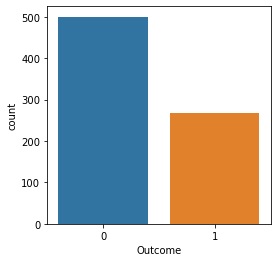

In [11]:
# Visualizing the number of 0's and 1's
plt.figure(figsize=(4,4));
sns.countplot(DataSet['Outcome']);

In [12]:
# Setting the independent and dependent variables
x = DataSet.iloc[ : , :-1].values
y = DataSet.iloc[ : , -1].values

In [13]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


In [14]:
# Splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10) 

In [15]:
# Fitting into the model
DT = tree.DecisionTreeClassifier()
DTC = DT.fit(x_train,y_train)

In [16]:
# Predicting the output
y_pred = DTC.predict(x_test)

In [17]:
# Accuracy score
metrics.accuracy_score(y_test, y_pred)

0.6883116883116883

In [18]:
Features = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']


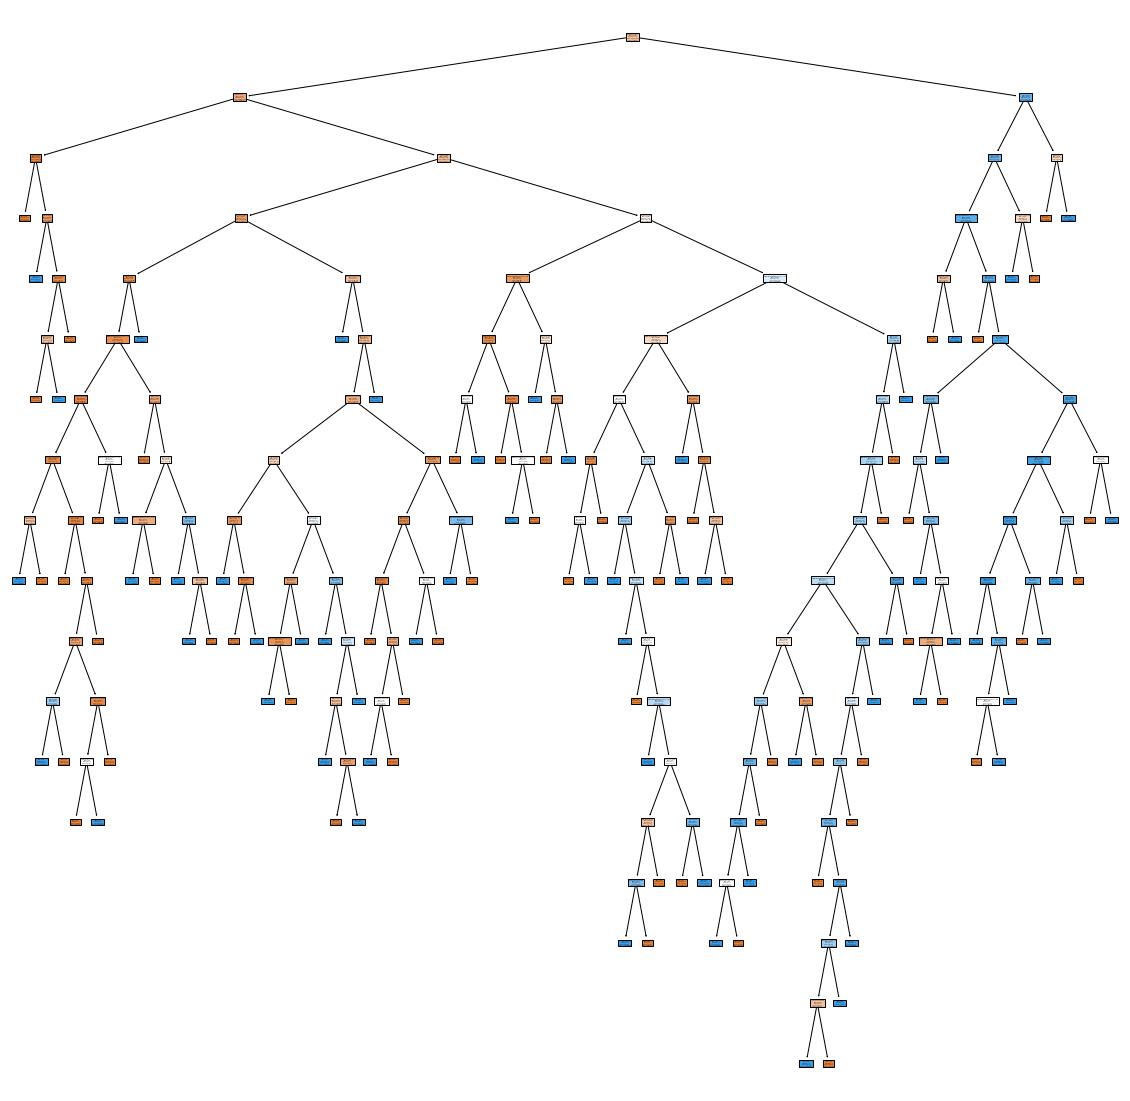

In [70]:
# Visualizing the decision tree
plt.figure(figsize=(20,20))
features = DataSet.columns
classes = ['Diabetic','Not diabetic']
tree.plot_tree(DT,feature_names=features,class_names=classes,filled=True)
plt.show()

In [19]:
# Fine tuning using grid search
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [21]:
param_grid = {   
    'max_depth':[5,10,20,],
    'min_samples_split':[20,40,60,80],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=1)
gridSearch.fit(x_train,y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.7524990003998401
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}


In [23]:
# Adapt grid based on result from initial grid search
param_grid = {
 'max_depth': list(range(3,12)), 
 'min_samples_split': list(range(15, 35)), 
 'min_impurity_decrease': [x/10000 for x in range(1, 900, 5)], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(x_train,y_train)

print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.7524990003998401
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0096, 'min_samples_split': 15}


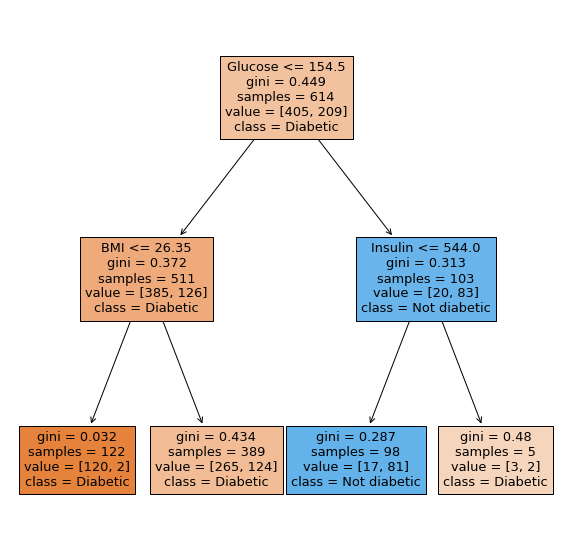

In [78]:
# Pruning( removing unwanted branches)
# Number of branches are removed
plt.figure(figsize=(10,10))
features = DataSet.columns
classes = ['Diabetic','Not diabetic']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()